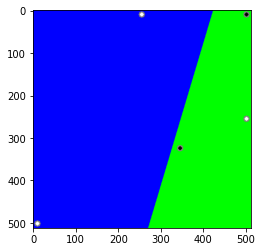

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

labels = np.array([1, -1, 1,-1, -1])
trainingData = np.matrix([[501, 10], [255, 10], [345,324],[501, 255], [10, 501]], dtype=np.float32)

np.random.rand(3, 4)

# Train the SVM
svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, 100, 1e-6))
svm.train(trainingData, cv2.ml.ROW_SAMPLE, labels)


# Data for visual representation
width = 512
height = 512
image = np.zeros((height, width, 3), dtype=np.uint8)
# Show the decision regions given by the SVM
green = (0,255,0)
blue = (0,0,255)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        sampleMat = np.matrix([[j,i]], dtype=np.float32)
        response = svm.predict(sampleMat)[1]
        if response == 1:
            image[i,j] = green
        elif response == -1:
            image[i,j] = blue
# Show the training data
thickness = -1
cv2.circle(image, (501,  10), 5, (  0,   0,   0), thickness)
cv2.circle(image, (255,  10), 5, (255, 255, 255), thickness)
cv2.circle(image, (345, 324), 5, (  0,   0,   0), thickness)
cv2.circle(image, (501, 255), 5, (255, 255, 255), thickness)
cv2.circle(image, ( 10, 501), 5, (255, 255, 255), thickness)
# Show support vectors
thickness = 2
sv = svm.getUncompressedSupportVectors()
for i in range(sv.shape[0]):
    cv2.circle(image, (int(sv[i,0]), int(sv[i,1])), 6, (128, 128, 128), thickness)

plt.imshow(image)
plt.show()


In [13]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import random as rng
NTRAINING_SAMPLES = 100 # Number of training samples per class
FRAC_LINEAR_SEP = 0.9   # Fraction of samples which compose the linear separable part
# Data for visual representation
WIDTH = 512
HEIGHT = 512
I = np.zeros((HEIGHT, WIDTH, 3), dtype=np.uint8)
# --------------------- 1. Set up training data randomly ---------------------------------------
trainData = np.empty((2*NTRAINING_SAMPLES, 2), dtype=np.float32)
labels = np.empty((2*NTRAINING_SAMPLES, 1), dtype=np.int32)
rng.seed(100) # Random value generation class
# Set up the linearly separable part of the training data
nLinearSamples = int(FRAC_LINEAR_SEP * NTRAINING_SAMPLES)
trainClass = trainData[0:nLinearSamples,:]
# The x coordinate of the points is in [0, 0.4)
c = trainClass[:,0:1]
c[:] = np.random.uniform(0.0, 0.4 * WIDTH, c.shape)
# The y coordinate of the points is in [0, 1)
c = trainClass[:,1:2]
c[:] = np.random.uniform(0.0, HEIGHT, c.shape)
# Generate random points for the class 2
trainClass = trainData[2*NTRAINING_SAMPLES-nLinearSamples:2*NTRAINING_SAMPLES,:]
# The x coordinate of the points is in [0.6, 1]
c = trainClass[:,0:1]
c[:] = np.random.uniform(0.6*WIDTH, WIDTH, c.shape)
# The y coordinate of the points is in [0, 1)
c = trainClass[:,1:2]
c[:] = np.random.uniform(0.0, HEIGHT, c.shape)
#------------------ Set up the non-linearly separable part of the training data ---------------
trainClass = trainData[nLinearSamples:2*NTRAINING_SAMPLES-nLinearSamples,:]
# The x coordinate of the points is in [0.4, 0.6)
c = trainClass[:,0:1]
c[:] = np.random.uniform(0.4*WIDTH, 0.6*WIDTH, c.shape)
# The y coordinate of the points is in [0, 1)
c = trainClass[:,1:2]
c[:] = np.random.uniform(0.0, HEIGHT, c.shape)
#------------------------- Set up the labels for the classes ---------------------------------
labels[0:NTRAINING_SAMPLES,:] = 1                   # Class 1
labels[NTRAINING_SAMPLES:2*NTRAINING_SAMPLES,:] = 2 # Class 2
#------------------------ 2. Set up the support vector machines parameters --------------------
print('Starting training process')
svm = cv.ml.SVM_create()
svm.setType(cv.ml.SVM_C_SVC)
svm.setC(0.1)
svm.setKernel(cv.ml.SVM_LINEAR)
svm.setTermCriteria((cv.TERM_CRITERIA_MAX_ITER, int(1e7), 1e-6))
#------------------------ 3. Train the svm ----------------------------------------------------
svm.train(trainData, cv.ml.ROW_SAMPLE, labels)
print('Finished training process')
#------------------------ 4. Show the decision regions ----------------------------------------
green = (0,100,0)
blue = (100,0,0)
for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        sampleMat = np.matrix([[j,i]], dtype=np.float32)
        response = svm.predict(sampleMat)[1]
        if response == 1:
            I[i,j] = green
        elif response == 2:
            I[i,j] = blue
#----------------------- 5. Show the training data --------------------------------------------
thick = -1
# Class 1
for i in range(NTRAINING_SAMPLES):
    px = trainData[i,0]
    py = trainData[i,1]
    cv.circle(I, (int(px), int(py)), 3, (0, 255, 0), thick)
# Class 2
for i in range(NTRAINING_SAMPLES, 2*NTRAINING_SAMPLES):
    px = trainData[i,0]
    py = trainData[i,1]
    cv.circle(I, (int(px), int(py)), 3, (255, 0, 0), thick)
#------------------------- 6. Show support vectors --------------------------------------------
thick = 2
sv = svm.getUncompressedSupportVectors()
for i in range(sv.shape[0]):
    cv.circle(I, (int(sv[i,0]), int(sv[i,1])), 6, (128, 128, 128), thick)

plt.figure(figsize=(10,10))
plt.imshow(I)
plt.show()

Starting training process


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\ml\src\svm.cpp:1319: error: (-211:One of the arguments' values is out of range) The kernel parameter <degree> must be positive in function 'cv::ml::SVMImpl::checkParams'
